# Stock Forecasting using Pastas

https://pastas.readthedocs.io/en/latest/index.html  
https://github.com/pastas/pastas  

In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pastas as ps

import yfinance as yf
yf.pdr_override()

In [2]:
stock = 'AMD' # input
start = '2017-01-01' # input 
end = '2021-11-08'  # input
df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,11.42,11.65,11.02,11.43,11.43,55182000
2017-01-04,11.45,11.52,11.24,11.43,11.43,40781200
2017-01-05,11.43,11.69,11.23,11.24,11.24,38855200
2017-01-06,11.29,11.49,11.11,11.32,11.32,34453500
2017-01-09,11.37,11.64,11.31,11.49,11.49,37304800


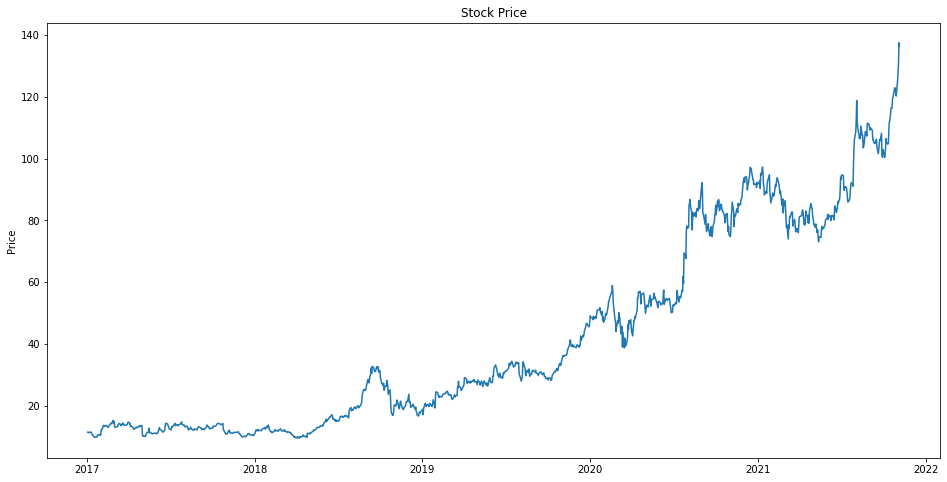

In [4]:
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'])
plt.title('Stock Price')
plt.ylabel('Price')
plt.show()

In [5]:
df['Returns'] = df['Adj Close'].pct_change()

In [6]:
df = df.dropna()

In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2017-01-04,11.45,11.52,11.24,11.43,11.43,40781200,0.000000
2017-01-05,11.43,11.69,11.23,11.24,11.24,38855200,-0.016623
2017-01-06,11.29,11.49,11.11,11.32,11.32,34453500,0.007117
2017-01-09,11.37,11.64,11.31,11.49,11.49,37304800,0.015018
2017-01-10,11.55,11.63,11.33,11.44,11.44,29201600,-0.004352


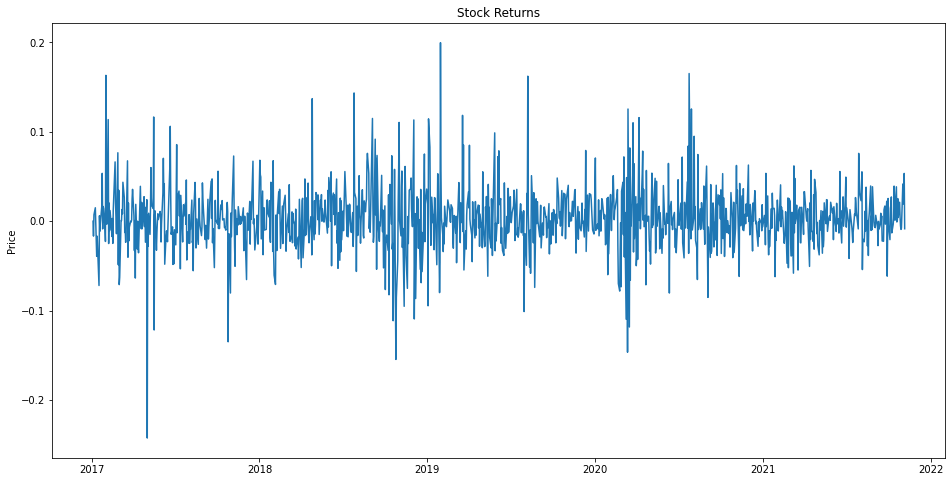

In [8]:
plt.figure(figsize=(16,8))
plt.plot(df['Returns'])
plt.title('Stock Returns')
plt.ylabel('Price')
plt.show()

In [9]:
df2 = df['Close'].resample('D').mean().interpolate('linear')

In [10]:
# Create a model object by passing it the observed series
ml = ps.Model(df2)

INFO: Inferred frequency for time series Close: freq=D


In [11]:
sm1 = ps.StressModel(df2, ps.Gamma, name='Close', settings='prec')
ml.add_stressmodel(sm1)
ml.solve(tmin='2017', tmax='2022')

INFO: Inferred frequency for time series Close: freq=D
INFO: Time Series Close was extended to 2007-01-07 00:00:00 with the mean value of the time series.


Fit report Close                     Fit Statistics
nfev    31                     EVP          100.00
nobs    1767                   R2             1.00
noise   True                   RMSE           0.00
tmin    2017-01-04 00:00:00    AIC       -73137.88
tmax    2021-11-05 00:00:00    BIC       -73110.49
freq    D                      Obj            0.00
warmup  3650 days 00:00:00     ___                
solver  LeastSquares           Interp.          No

Parameters (5 optimized)
                  optimal   stderr    initial  vary
Close_A      1.000000e+00   ±0.00%   0.031438  True
Close_n      1.038529e-01   ±0.04%   1.000000  True
Close_a      6.148482e-02   ±0.05%  10.000000  True
constant_d  -6.143604e-08  ±50.52%  42.071907  True
noise_alpha  2.482164e+03   ±0.00%   1.000000  True


<AxesSubplot:title={'center':'Results of Close'}, ylabel='Groundwater levels [meter]'>

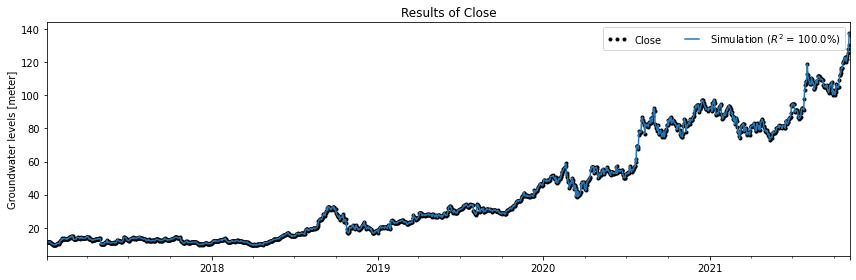

In [12]:
ml.plot(figsize=(12, 4))

In [13]:
sm1 = ps.StressModel(df2, ps.Gamma, name='forecast', settings='prec')
ml.add_stressmodel(sm1)
ml.solve(tmin='2017', tmax='2022', solver=ps.LeastSquares)

INFO: Inferred frequency for time series Close: freq=D
INFO: Time Series Close was extended to 2007-01-07 00:00:00 with the mean value of the time series.


Fit report Close                     Fit Statistics
nfev    28                     EVP          100.00
nobs    1767                   R2             1.00
noise   True                   RMSE           0.00
tmin    2017-01-04 00:00:00    AIC       -71802.92
tmax    2021-11-05 00:00:00    BIC       -71759.11
freq    D                      Obj            0.00
warmup  3650 days 00:00:00     ___                
solver  LeastSquares           Interp.          No

Parameters (8 optimized)
                  optimal   stderr    initial  vary
Close_A      5.000004e-01   ±0.01%   0.031438  True
Close_n      1.038045e-01   ±0.09%   1.000000  True
Close_a      6.326797e-02   ±0.11%  10.000000  True
forecast_A   4.999996e-01   ±0.01%   0.031438  True
forecast_n   1.045667e-01   ±0.09%   1.000000  True
forecast_a   6.238888e-02   ±0.12%  10.000000  True
constant_d  -8.950707e-08  ±35.79%  42.071907  True
noise_alpha  1.466305e+03   ±0.00%   1.000000  True


In [14]:
ml = ps.Model(df2)
sm1 = ps.StressModel(df2, ps.Gamma, name='forecast', settings='prec')
ml.add_stressmodel(sm1)
ml.set_parameter('forecast_n', vary=False)
ml.solve(tmin='2017', tmax='2022', solver=ps.LeastSquares)

INFO: Inferred frequency for time series Close: freq=D
INFO: Inferred frequency for time series Close: freq=D
INFO: Time Series Close was extended to 2007-01-07 00:00:00 with the mean value of the time series.


Fit report Close                      Fit Statistics
nfev    54                     EVP          100.00
nobs    1767                   R2             1.00
noise   True                   RMSE           0.00
tmin    2017-01-04 00:00:00    AIC       -79780.05
tmax    2021-11-05 00:00:00    BIC       -79758.14
freq    D                      Obj            0.00
warmup  3650 days 00:00:00     ___                
solver  LeastSquares           Interp.          No

Parameters (4 optimized)
                  optimal   stderr    initial   vary
forecast_A   1.000000e+00   ±0.00%   0.031438   True
forecast_n   1.000000e+00    ±nan%   1.000000  False
forecast_a   4.366624e-02   ±0.02%  10.000000   True
constant_d  -1.123650e-11  ±56.66%  42.071907   True
noise_alpha  2.789899e-01  ±23.96%   1.000000   True


<AxesSubplot:title={'center':'Results of Close'}, ylabel='Groundwater levels [meter]'>

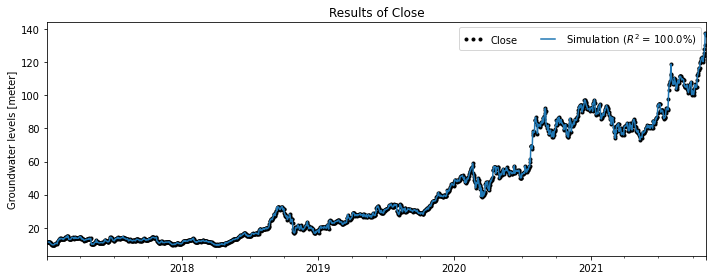

In [15]:
ml.plot(figsize=(10, 4))